## Imports

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Importing dataset

In [23]:
df = pd.read_csv('ncr_ride_bookings.csv')

## Data Exploration

In [24]:
#check the number of rows and columns
df.shape

(150000, 21)

In [25]:
#Get a quick overview of the data
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [26]:
#Check data types (object, numeric) and non-null values
print("Data infos")
df.info()

Data infos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Cus

In [27]:
#This helps to identify which columns can be analyzed statistically
print("object columns")
for col in df.select_dtypes(include=['object']):
    print(col)

print("\nnumeric columns")
for col in df.select_dtypes(include=['number']):
    print(col)

object columns
Date
Time
Booking ID
Booking Status
Customer ID
Vehicle Type
Pickup Location
Drop Location
Reason for cancelling by Customer
Driver Cancellation Reason
Incomplete Rides Reason
Payment Method

numeric columns
Avg VTAT
Avg CTAT
Cancelled Rides by Customer
Cancelled Rides by Driver
Incomplete Rides
Booking Value
Ride Distance
Driver Ratings
Customer Rating


In [28]:
#Get mean, std, min, max, and quartiles
print("description data")
df.describe()

description data


,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [29]:
# check for duplicated rows
df.duplicated().sum()

0

In [30]:
#Identify columns with missing data
print("Missing Values")
df.isnull().sum()

Missing Values


Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

## Data Cleaning & Preprocessing

In [31]:
#Create a 'date_time' column by combining 'Date' and 'Time'
df['date_time']= pd.to_datetime(df['Date']+' '+df['Time'])

#Extract 'Month','Day','Hour' from 'date_time'
df['Month']= df['date_time'].dt.month
df['Day']= df['date_time'].dt.day_name()
df['Hour']=df['date_time'].dt.hour

#Sort the dataframe by 'date_time'
df= df.sort_values(by='date_time')

#Reorder columns to have 'Month', 'Day', 'Hour' first
new_cols= ['Month','Day','Hour']
df= df[ new_cols + [c for c in df.columns if c not in new_cols ]]



df= df.reset_index(drop= True)

## Exploratory Data Analysis (EDA)

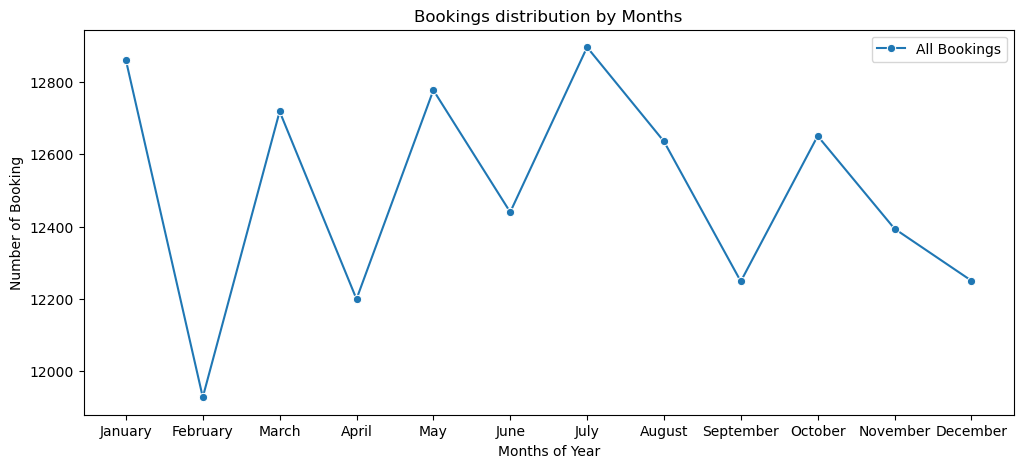

In [32]:
#Bookings distribution by Months :

# Compute mean bookings per month
month_means = df.groupby('Month').size().groupby(level=0).mean()

# Or simpler (directly with groupby):
month_means = df.groupby('Month').size().reindex(range(1,13), fill_value=0)

# Plot
sns.lineplot(x=month_means.index, y=month_means.values, marker='o', label="All Bookings")

plt.xlabel("Months of Year")
plt.ylabel("Number of Booking")
plt.title("Bookings distribution by Months")
plt.xticks(ticks=range(1,13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.gcf().set_size_inches(12, 5)
plt.legend()
plt.show()

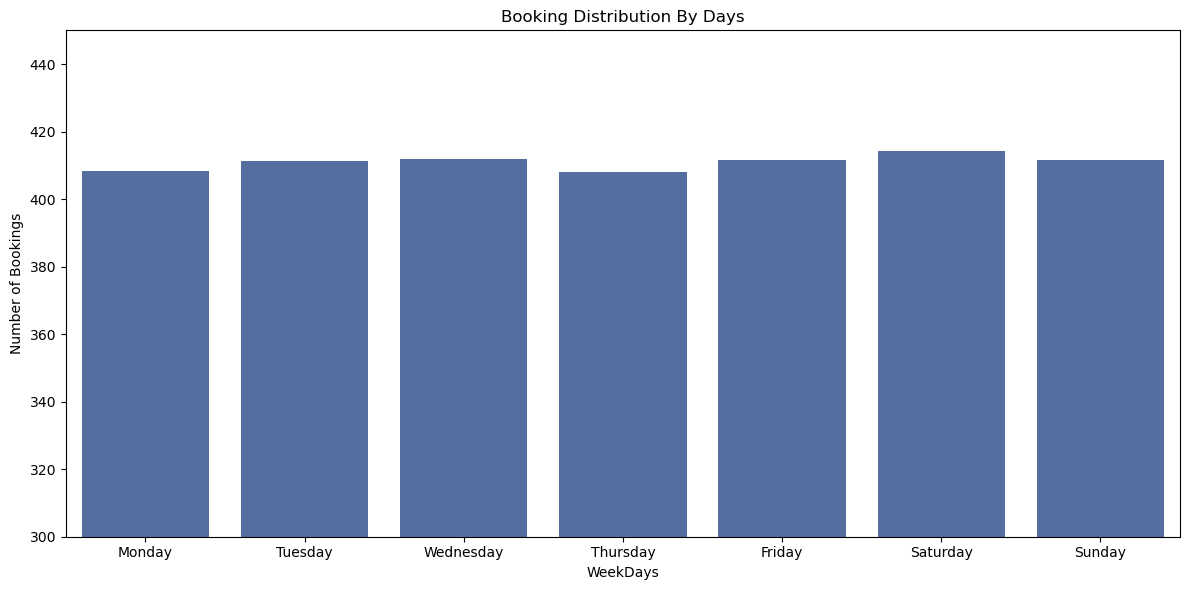

In [33]:
# Booking Distribution by Days :

booking_perDay= df.groupby(['Date','Day']).size().reset_index(name= 'count')
mean_bookingperDay= booking_perDay.groupby('Day')['count'].mean().reset_index()

ordered_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(12,6))
sns.barplot(data= mean_bookingperDay, x= 'Day', y= 'count',order= ordered_days, color= "#486aad")
plt.ylabel('Number of Bookings')
plt.xlabel('WeekDays')
plt.title( 'Booking Distribution By Days')
plt.ylim(300,450)
plt.tight_layout()
plt.show()

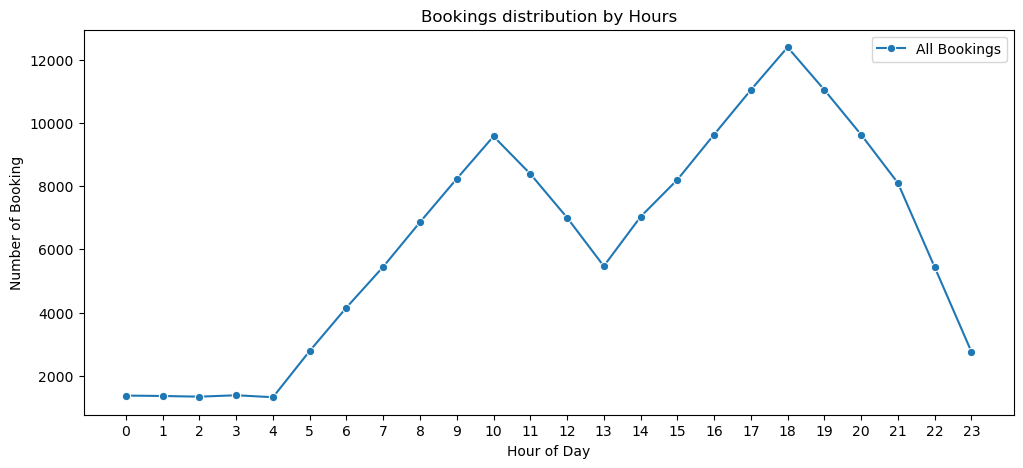

In [34]:
# Define full range of hours
hours = range(0, 24)

# Count total bookings per hour
hour_counts = df['Hour'].value_counts().reindex(hours, fill_value=0)

# Plot
sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o', label="All Bookings")

plt.xlabel("Hour of Day")
plt.ylabel("Number of Booking")
plt.title("Bookings distribution by Hours")
plt.xticks(range(0,24))
plt.gcf().set_size_inches(12, 5)
plt.legend()
plt.show()

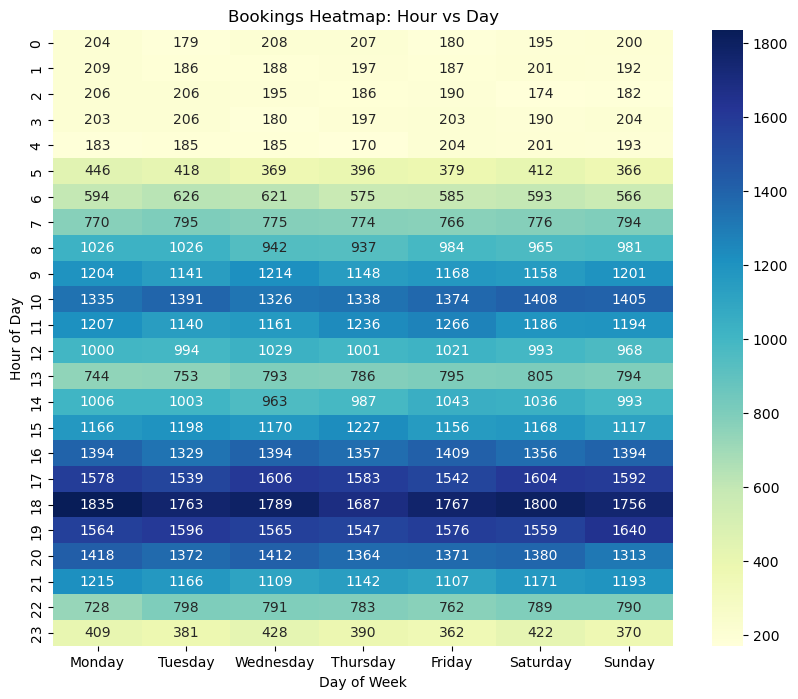

In [35]:
# Bookings heatmap: Hour vs Day

# Define ordered days (so they don't appear randomly)
ordered_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]


# Create a pivot table: rows=hour, columns=day, values=number of bookings
heatmap_data = df.pivot_table(index='Hour', columns='Day', values='Booking ID', aggfunc='count').reindex(columns=ordered_days)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.title("Bookings Heatmap: Hour vs Day")
plt.show()

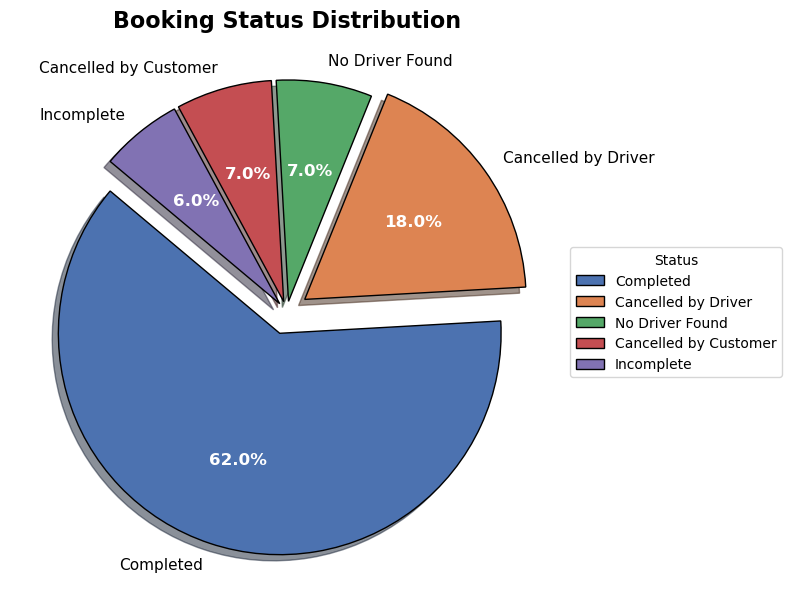

In [36]:
#Booking status distribution

#Count occurrences of each booking status
counts = df['Booking Status'].value_counts()

#Total booking status
total = counts.sum()

#Define explosion to highlight important segments (>15%)
explode = [0.1 if (v / total) >= 0.15 else 0.05 for v in counts.values]

#Plot
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors = sns.color_palette("deep") ,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

#Style tweaks
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

#Title
ax.set_title("Booking Status Distribution", fontsize=16, fontweight='bold')

#Legend (in case labels overlap)
ax.legend(wedges, counts.index, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

A large percentage of bookings are not completed (38%):

- Cancelled by driver: 18%
- Cancelled by customer: 7%
- No driver found: 7%
- Incomplete rides: 6%

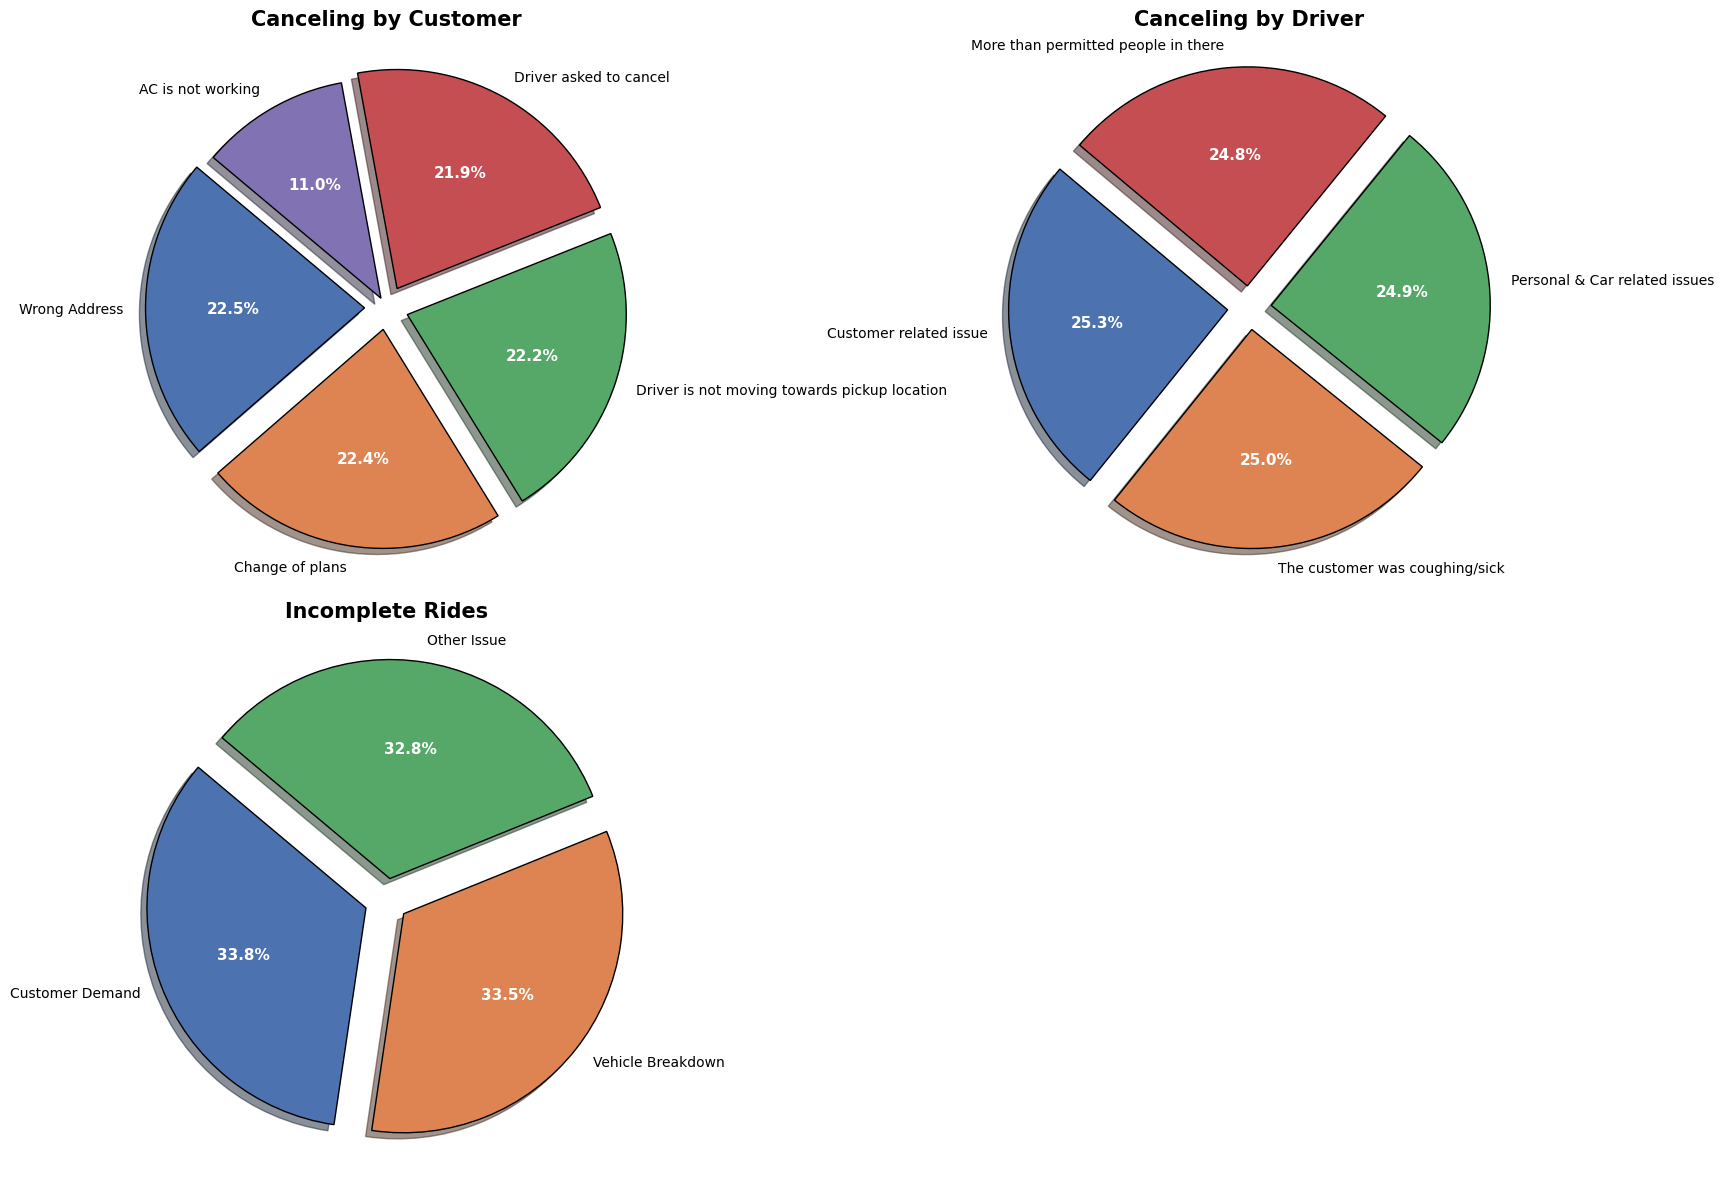

In [37]:
# Reasons for Each Booking Status :

#Define the three columns
cols = ["Reason for cancelling by Customer", "Driver Cancellation Reason", "Incomplete Rides Reason"]
titles = ["Canceling by Customer", "Canceling by Driver", "Incomplete Rides"]
#2 rows x 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # bigger figure
axes = axes.flatten()  # flatten to 1D array for easy indexing

for i, (col, title) in enumerate(zip(cols, titles)):
    counts = df[col].value_counts(dropna=True)
    total = counts.sum()
    
    #Explode slices
    explode = [0.1 if v/total >= 0.15 else 0.05 for v in counts.values]
    

    wedges, texts, autotexts = axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        explode=explode,
        wedgeprops={'edgecolor': 'black'},
        colors= sns.color_palette("deep") ,
    )
    
    for text in texts:
        text.set_fontsize(10)
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    axes[i].set_title(title, fontsize=15, fontweight='bold')
    axes[i].set_aspect('equal')

#Remove the empty 4th subplot
fig.delaxes(axes[3])

plt.tight_layout()
plt.show()

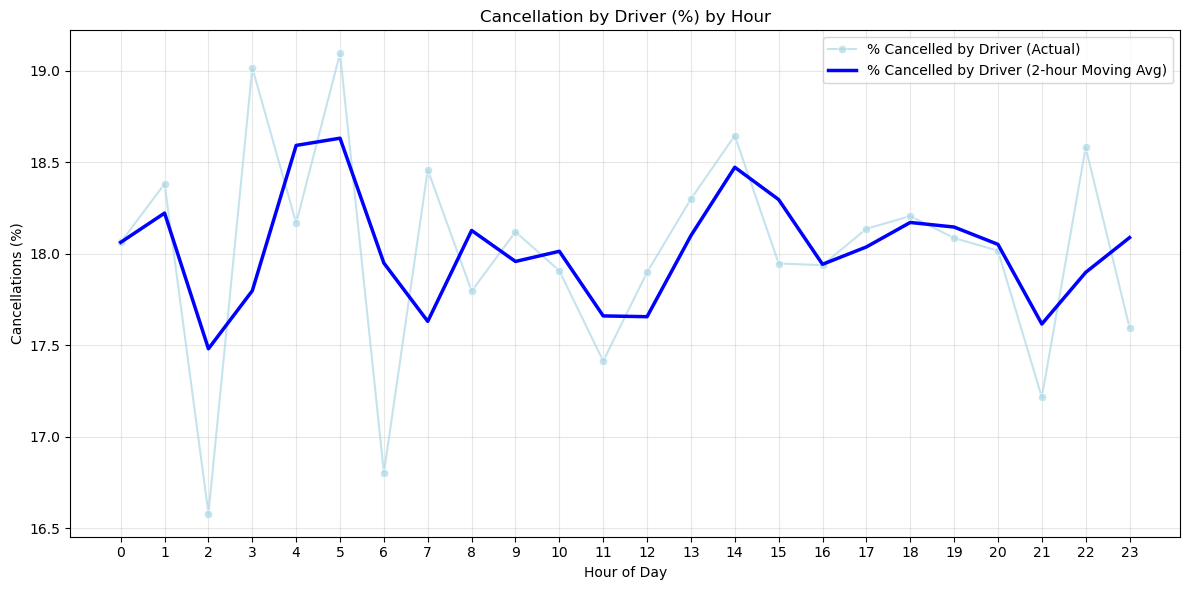

In [41]:
# Define hours range and calculate total bookings per hour
hour_counts = df['Hour'].value_counts().reindex(range(24), fill_value=0)

# Create figure and plot cancellation rates
fig, ax = plt.subplots(figsize=(12, 6))

status_counts = df[df['Booking Status'] == 'Cancelled by Driver']['Hour'].value_counts().reindex(range(24), fill_value=0)
status_rate = (status_counts / hour_counts.replace(0, np.nan) * 100).fillna(0)

# Calculate moving average (3-hour window for smoothing)
window_size = 2
moving_avg = status_rate.rolling(window=window_size, center=True, min_periods=1).mean()

# Plot original data and smoothed line
sns.lineplot(x=status_rate.index, y=status_rate.values, marker='o', 
             label="% Cancelled by Driver (Actual)", color='lightblue', alpha=0.7, ax=ax)

sns.lineplot(x=moving_avg.index, y=moving_avg.values, 
             label=f"% Cancelled by Driver ({window_size}-hour Moving Avg)", color='blue', linewidth=2.5, ax=ax)

# Customize plot
ax.set(xlabel="Hour of Day", ylabel="Cancellations (%)", 
       title="Cancellation by Driver (%) by Hour", xticks=range(24))
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

This figure presents a line plot visualizing the driver cancellation rate throughout the day (by hour). The visualization will show:

Actual cancellation rates (light blue line) - raw hourly data
Smoothed trend (dark blue line) - 2-hour moving average for clearer pattern recognition
This approach helps reveal underlying patterns while maintaining important hourly variations.


The driver cancellation rate remains relatively stable over the day with minor fluctuations.
Peak driver cancellation period: 4-5 AM
Lowest driver cancellation time: 2 AM

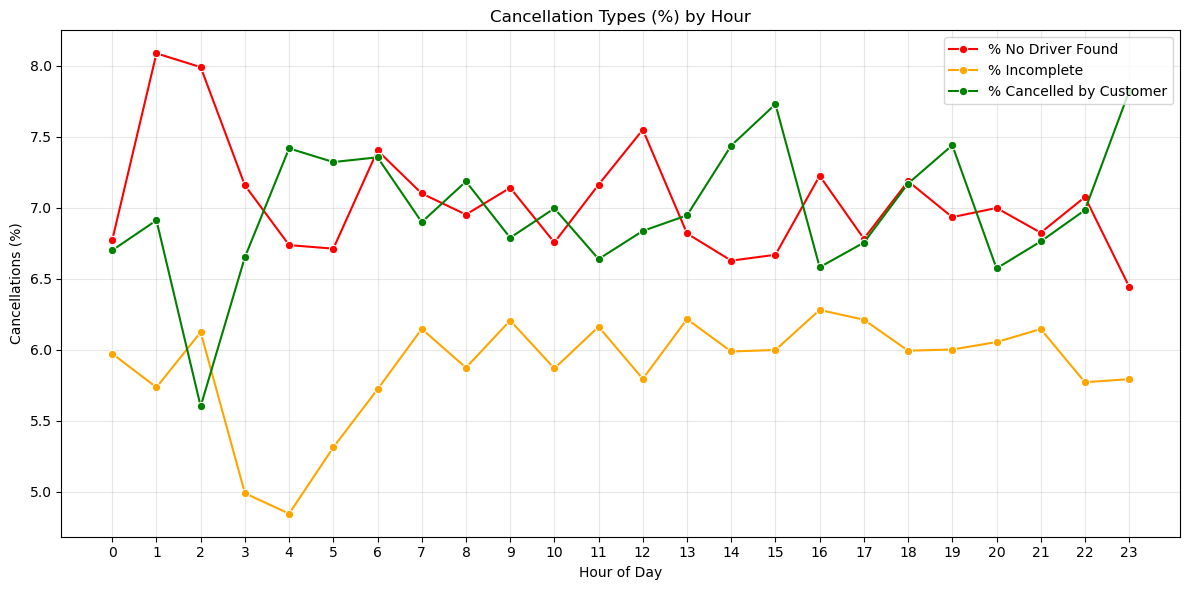

In [42]:
# Cancellation types Rate Analysis by Hour :
# Define the cancellation types
cancellation_types = {
    'No Driver Found': 'red',
    'Incomplete': 'orange',
    'Cancelled by Customer': 'green'
}


# Create the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate and plot each cancellation type
for status, color in cancellation_types.items():
    # Filter data for this booking status
    status_df = df[df['Booking Status'] == status]
    
    # Count cancellations per hour
    status_counts = status_df['Hour'].value_counts().reindex(range(24), fill_value=0)
    
    # Compute percentage cancellations
    status_rate = (status_counts / hour_counts.replace(0, np.nan) * 100).fillna(0)
    
    # Plot the line
    sns.lineplot(x=status_rate.index, y=status_rate.values,
                marker='o', label=f"% {status}", color=color, ax=ax1)

# Customize the plot
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Cancellations (%)")
ax1.set_title("Cancellation Types (%) by Hour")
ax1.set_xticks(range(0, 24))
ax1.grid(True, alpha=0.3)

# Position legend
plt.legend(loc="upper right", bbox_to_anchor=(1, 1))

# Adjust layout and show
plt.tight_layout()
plt.show()

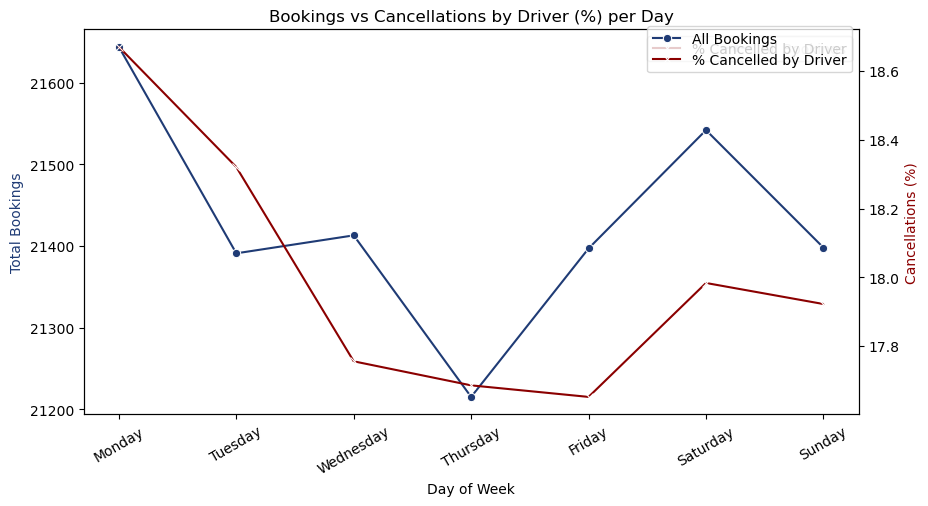

In [43]:
#Weekly Booking Patterns and Driver Cancellation Rates:

# Define ordered days (so they don't appear randomly)
ordered_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Count total bookings per day
day_counts = df.groupby("Day").size().reindex(ordered_days, fill_value=0)

# Count cancellations by driver per day
canco = df[df["Booking Status"] == "Cancelled by Driver"].groupby("Day").size().reindex(ordered_days, fill_value=0)

# Compute % cancellations
cancel_rate = (canco / day_counts.replace(0, np.nan) * 100).fillna(0)

# Plot
fig, ax1 = plt.subplots(figsize=(10,5))

# Total bookings
sns.lineplot(x=day_counts.index, y=day_counts.values,
             marker='o', label="All Bookings", color= "#1f3b75", ax=ax1)
ax1.set_xlabel("Day of Week")
ax1.set_ylabel("Total Bookings", color="#1f3b75")

# Cancellation rate
ax2 = ax1.twinx()
sns.lineplot(x=cancel_rate.index, y=cancel_rate.values,
             marker='x', label="% Cancelled by Driver", color="#8b0000", ax=ax2)
ax2.set_ylabel("Cancellations (%)", color="#8b0000")

# Beautify
plt.title("Bookings vs Cancellations by Driver (%) per Day")
ax1.set_xticks(range(0,7))
ax1.set_xticklabels(ordered_days, rotation=30)
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))
plt.show()

/var/folders/5w/4ff_gxlx0nv25vqjh555dnfm0000gn/T/ipykernel_52068/4105908361.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_per_location.values, y=mean_per_location.index, palette="deep")


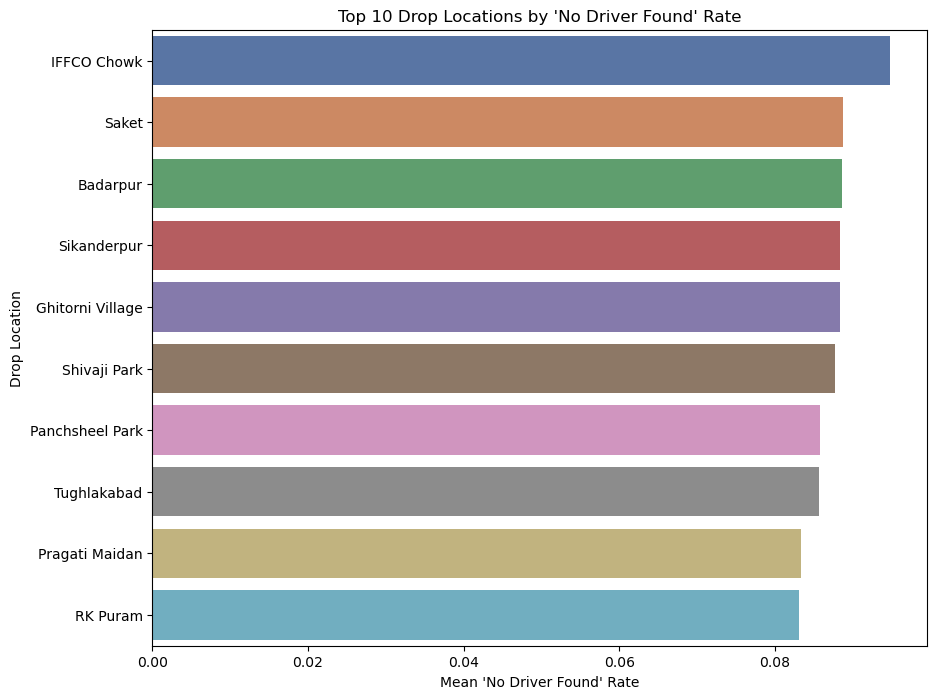

In [44]:
#Destinations with "No Driver Found :

# Create a column that is 1 if 'No Driver Found', else 0
df['No_Driver_Found_Flag'] = (df['Booking Status'].str.strip() == 'No Driver Found').astype(int)

# Compute mean per Drop Location (this gives the rate)
mean_per_location = df.groupby('Drop Location')['No_Driver_Found_Flag'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,8))
sns.barplot(x=mean_per_location.values, y=mean_per_location.index, palette="deep")
plt.xlabel("Mean 'No Driver Found' Rate")
plt.ylabel("Drop Location")
plt.title("Top 10 Drop Locations by 'No Driver Found' Rate")
plt.show()


(37, 5)
Day_Type              Weekday  Weekend  Total  Weekend_Ratio  Weekday_Ratio
Drop Location                                                              
Pulbangash                547      279    826       0.337772       0.662228
Govindpuri                557      280    837       0.334528       0.665472
IIT Delhi                 579      277    856       0.323598       0.676402
Netaji Subhash Place      580      277    857       0.323221       0.676779
Rithala                   580      276    856       0.322430       0.677570


/var/folders/5w/4ff_gxlx0nv25vqjh555dnfm0000gn/T/ipykernel_52068/3385568248.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weekend.values, y=top_weekend.index, palette="Blues_r")


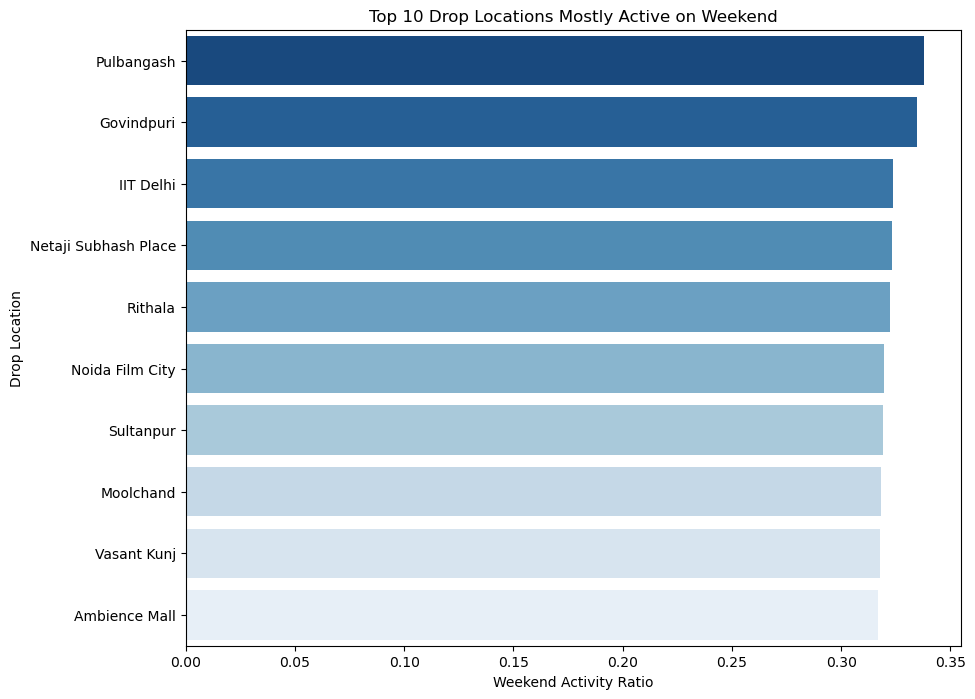

In [45]:
#Top 10 Drop Locations Mostly Active on Weekend :

weekend = ['Saturday', 'Sunday']
df['Day_Type'] = df['Day'].apply(lambda x: 'Weekend' if x in weekend else 'Weekday')


location_activity = df.groupby(['Drop Location', 'Day_Type']).size().unstack(fill_value=0)
location_activity['Total'] = location_activity['Weekday'] + location_activity['Weekend']
location_activity['Weekend_Ratio'] = location_activity['Weekend'] / location_activity['Total']
location_activity['Weekday_Ratio'] = location_activity['Weekday'] / location_activity['Total']


# Threshold for "mostly weekend" or "mostly weekday" (e.g., >70%)
mostly_weekend = location_activity[location_activity['Weekend_Ratio'] > 0.3].sort_values(by='Weekend_Ratio', ascending=False)
mostly_weekday = location_activity[location_activity['Weekday_Ratio'] > 0.3].sort_values(by='Weekday_Ratio', ascending=False)

print(mostly_weekend.shape)
print(mostly_weekend.head())


# Top 10 mostly weekend locations
top_weekend = mostly_weekend['Weekend_Ratio'].head(10)

plt.figure(figsize=(10,8))
sns.barplot(x=top_weekend.values, y=top_weekend.index, palette="Blues_r")
plt.xlabel("Weekend Activity Ratio")
plt.ylabel("Drop Location")
plt.title("Top 10 Drop Locations Mostly Active on Weekend")
plt.show()

(60.0, 170.0)

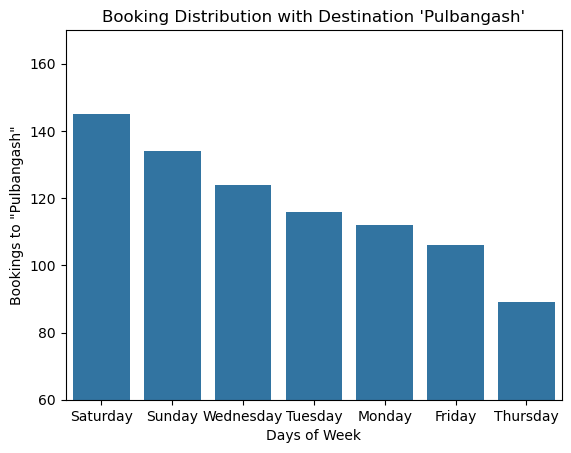

In [46]:
# Booking Distribution with Destination "Pulbangash" :
canci= df[df['Drop Location']== 'Pulbangash']
cnti = canci.groupby('Day').size().reset_index(name='pulbangash')
cnti = cnti.sort_values(by='pulbangash', ascending=False)
sns.barplot(x= "Day",y='pulbangash',data= cnti)
plt.ylabel('Bookings to "Pulbangash"')
plt.xlabel('Days of Week')
plt.title("Booking Distribution with Destination 'Pulbangash'")
plt.ylim(60,170)

(176, 5)
Day_Type          Weekday  Weekend  Total  Weekend_Ratio  Weekday_Ratio
Drop Location                                                          
Huda City Centre      581      193    774       0.249354       0.750646
Kaushambi             644      215    859       0.250291       0.749709
Hauz Khas             667      225    892       0.252242       0.747758
Kirti Nagar           614      213    827       0.257557       0.742443
Subhash Chowk         603      212    815       0.260123       0.739877


/var/folders/5w/4ff_gxlx0nv25vqjh555dnfm0000gn/T/ipykernel_52068/3747471882.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weekday.values, y=top_weekday.index, palette="Blues_r")


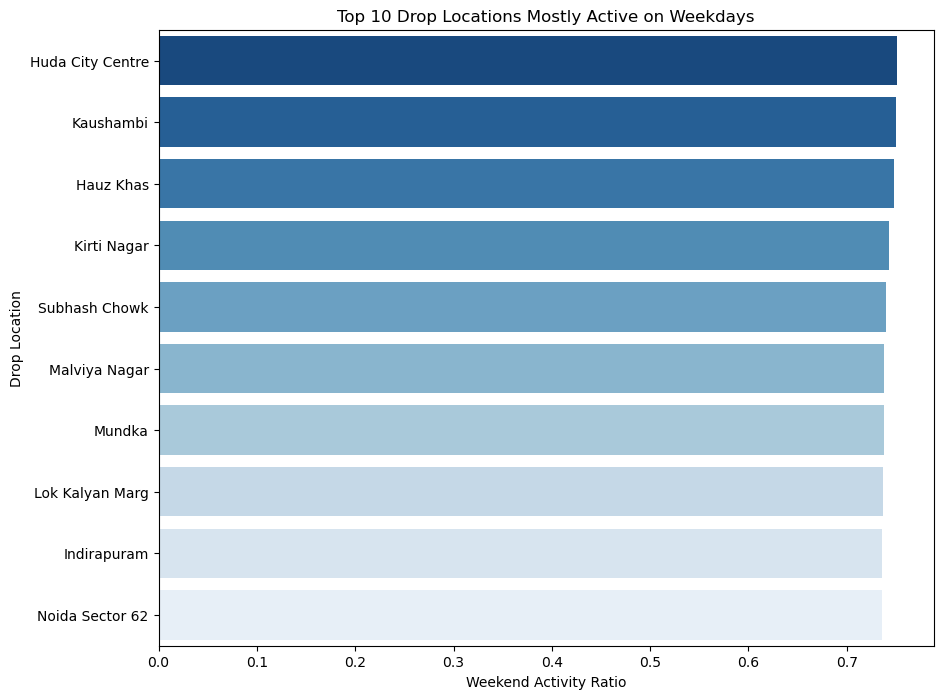

In [47]:
# Top 10 Drop Locations Mostly Active on Weekdays :
print(mostly_weekday.shape)
print(mostly_weekday.head())


# Top 10 mostly weekend locations
top_weekday = mostly_weekday['Weekday_Ratio'].head(10)

plt.figure(figsize=(10,8))
sns.barplot(x=top_weekday.values, y=top_weekday.index, palette="Blues_r")
plt.xlabel("Weekend Activity Ratio")
plt.ylabel("Drop Location")
plt.title("Top 10 Drop Locations Mostly Active on Weekdays")
plt.show()

(60.0, 135.0)

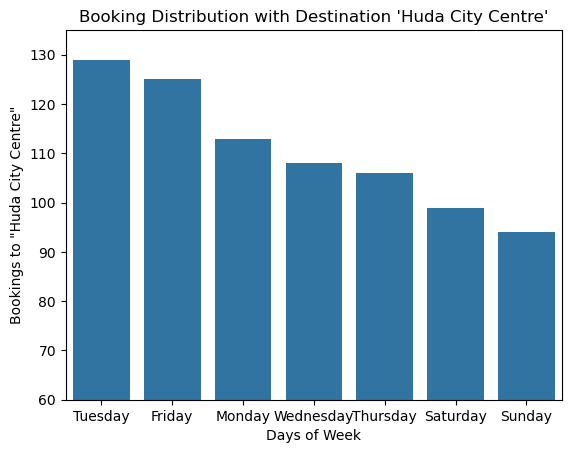

In [48]:
#Booking Distribution with Destination "Huda City Centre" :

canci= df[df['Drop Location']== 'Huda City Centre']
cnti = canci.groupby('Day').size().reset_index(name='huda')
cnti = cnti.sort_values(by='huda', ascending=False)
sns.barplot(x= "Day",y='huda',data= cnti)
plt.ylabel('Bookings to "Huda City Centre"')
plt.xlabel('Days of Week')
plt.title("Booking Distribution with Destination 'Huda City Centre'")
plt.ylim(60,135)

/var/folders/5w/4ff_gxlx0nv25vqjh555dnfm0000gn/T/ipykernel_52068/2338277581.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drop.values, y=top_drop.index, ax=axes[0], palette="Blues_r")
/var/folders/5w/4ff_gxlx0nv25vqjh555dnfm0000gn/T/ipykernel_52068/2338277581.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickup.values, y=top_pickup.index, ax=axes[1], palette="Greens_r")


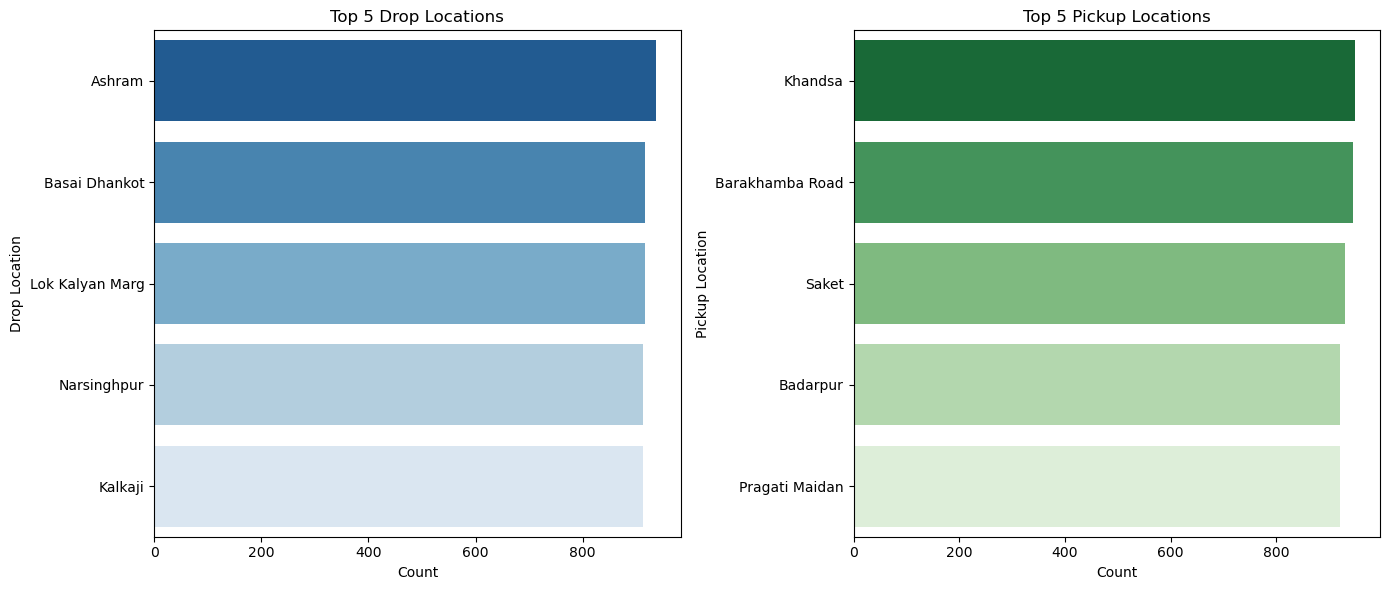

In [49]:
# Most Popular Pickup and Drop Locations :

# Top 5 Drop Locations
top_drop = df['Drop Location'].value_counts().head(5)

# Top 5 Pickup Locations
top_pickup = df['Pickup Location'].value_counts().head(5)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Drop Locations
sns.barplot(x=top_drop.values, y=top_drop.index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 5 Drop Locations")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Drop Location")

# Pickup Locations
sns.barplot(x=top_pickup.values, y=top_pickup.index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 5 Pickup Locations")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Pickup Location")

plt.tight_layout()
plt.show()

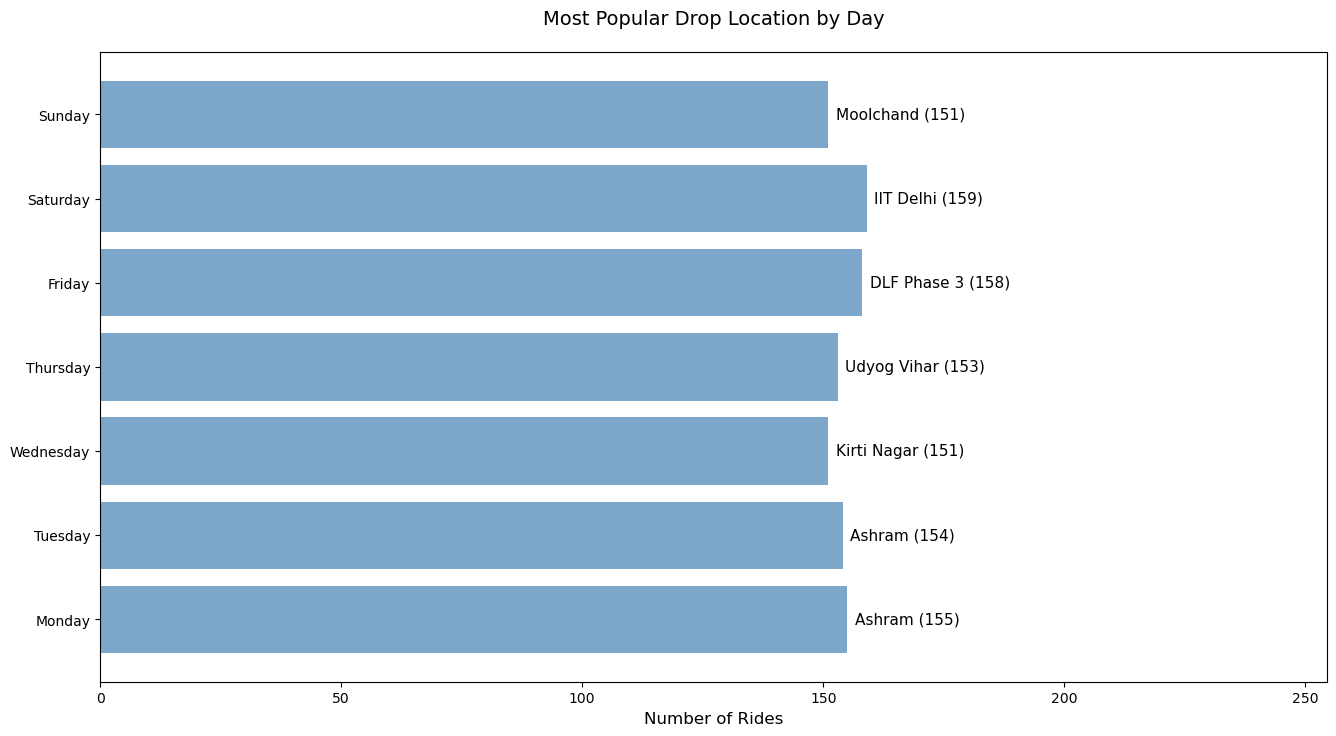

OVERALL STATISTICS
Total rides analyzed: 150,000
Total unique drop locations: 176
Most popular location overall: Ashram
Most popular location rides: 936

Rides per day:
  Monday: 21,644 rides (14.4%)
  Tuesday: 21,391 rides (14.3%)
  Wednesday: 21,413 rides (14.3%)
  Thursday: 21,215 rides (14.1%)
  Friday: 21,397 rides (14.3%)
  Saturday: 21,542 rides (14.4%)
  Sunday: 21,398 rides (14.3%)


In [51]:
# Most Popular Drop Locations by Day of Week :

#Remove rows with null values in key columns
df_clean = df[['Drop Location', 'Day']].dropna()

#Define day order for proper sorting
#day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Get top drop location for each day
top_locations_by_day = []
for Day in ordered_days:
    day_data = df_clean[df_clean['Day'] == Day]
    if not day_data.empty:
        top_location = day_data['Drop Location'].value_counts().index[0]
        count = day_data['Drop Location'].value_counts().iloc[0]
        top_locations_by_day.append({
            'Day': Day,
            'Top_Location': top_location,
            'Count': count
        })

top_df = pd.DataFrame(top_locations_by_day)

#Create visualizationbar plot
fig = plt.figure(figsize=(14, 8))

#Horizontal bar chart for better readability
ax = plt.subplot(1, 1, 1)
if not top_df.empty:
    y_pos = np.arange(len(top_df))
    bars = ax.barh(y_pos, top_df['Count'], color='steelblue', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_df['Day'])
    ax.set_xlabel('Number of Rides', fontsize=12)
    ax.set_title('Most Popular Drop Location by Day', fontsize=14, pad=20)
    
    #Add location names and counts to the right of bars
    for i, (bar, location, count) in enumerate(zip(bars, top_df['Top_Location'], top_df['Count'])):
        # Truncate long location names
        display_name = location if len(location) <= 30 else location[:27] + "..."
        ax.text(bar.get_width() + max(top_df['Count']) * 0.01, bar.get_y() + bar.get_height()/2,
                f'{display_name} ({count:,})', va='center', ha='left', fontsize=11)
    
    # Extend x-axis to make room for text
    ax.set_xlim(0, max(top_df['Count']) * 1.6)

plt.tight_layout(pad=3.0)
plt.show()

# Print overall statistics
print("=" * 80)
print("OVERALL STATISTICS")
print("=" * 80)
print(f"Total rides analyzed: {len(df_clean):,}")
print(f"Total unique drop locations: {df_clean['Drop Location'].nunique():,}")
print(f"Most popular location overall: {df_clean['Drop Location'].value_counts().index[0]}")
print(f"Most popular location rides: {df_clean['Drop Location'].value_counts().iloc[0]:,}")

#Day-wise ride distribution
print(f"\nRides per day:")
day_counts = df_clean['Day'].value_counts().reindex(ordered_days)
for day, count in day_counts.items():
    if pd.notna(count):
        percentage = (count / len(df_clean)) * 100
        print(f"  {day}: {count:,} rides ({percentage:.1f}%)")

## Machine Learning : Customer Clustring

In [52]:
# Creating completion flag and aggregate customer data :

df["completion_Flag"] = (df["Booking Status"] == "Completed").astype(int)

# Aggregate per customer
customer_data = df.groupby("Customer ID").agg(
    Total_Rides=("Booking ID", "count"),
    Completion_Ratio=("completion_Flag", "mean"),  # proportion of completed bookings
    Avg_Booking_value=("Booking Value", "mean"),
    Avg_Distance=("Ride Distance", "mean"), 
    Avg_Rating=("Driver Ratings", "mean")
).reset_index()

# Compute Preferred_Payment separately
preferred_payment = df.groupby("Customer ID")["Payment Method"] \
                      .agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else "Unknown") \
                      .reset_index(name="Preferred_Payment")

# Merge back
customer_data = customer_data.merge(preferred_payment, on="Customer ID")

In [55]:
# Handle missing values and perform clustering:

# Handle missing values with business logic
customer_data["Avg_Distance"] = customer_data["Avg_Distance"].fillna(0)  # No completed rides = 0 distance
customer_data["Avg_Booking_value"] = customer_data["Avg_Booking_value"].fillna(0)  # No completed rides = 0 value
customer_data["Avg_Rating"] = customer_data["Avg_Rating"].fillna(0)  # No completed rides = 0 rating
customer_data["Preferred_Payment"] = customer_data["Preferred_Payment"].fillna("None")  # No completed rides = "None"

# Keep original payment methods for analysis
customer_data["Preferred_Payment_Original"] = customer_data["Preferred_Payment"].copy()

# Encode categorical feature
encoder = LabelEncoder()
customer_data["Preferred_Payment_Encoded"] = encoder.fit_transform(customer_data["Preferred_Payment"].astype(str))

# Scale features
features = ["Total_Rides", "Avg_Distance", "Completion_Ratio", "Avg_Booking_value", "Avg_Rating", "Preferred_Payment_Encoded"]
X = customer_data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering
kmeans = KMeans(n_clusters=3,n_init=10, random_state=42)
customer_data["cluster"] = kmeans.fit_predict(X_scaled)

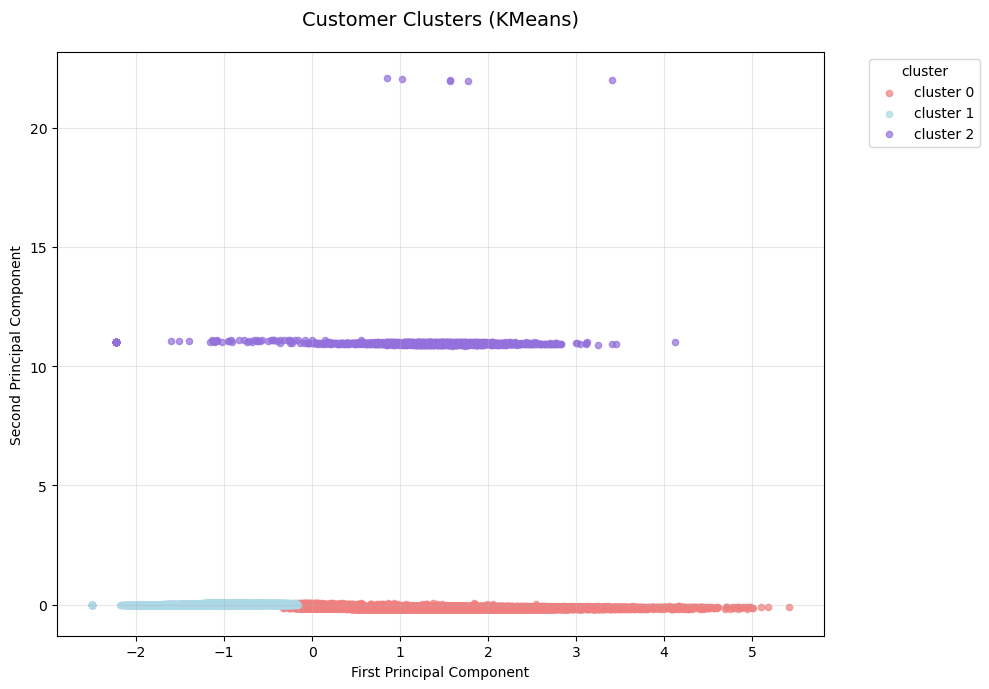

=== CLUSTER ANALYSIS ===

Numerical Features by Cluster:
         Total_Rides  Avg_Distance  Completion_Ratio  Avg_Booking_value  \
cluster                                                                   
0                1.0         25.95              1.00             512.43   
1                1.0          1.59              0.00              70.54   
2                2.0         21.81              0.61             452.91   

         Avg_Rating  
cluster              
0              4.21  
1              0.00  
2              3.61  


Payment Method Distribution by Cluster:
Count of customers by payment method:
Preferred_Payment_Original   Cash  Credit Card  Debit Card    UPI  \
cluster                                                             
0                           23003         9217        7427  41209   
1                            1955          816         680   3971   
2                             368          132          99    414   

Preferred_Payment_Original  Ube

In [56]:
#Enhanced visualization and analysis :

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create the visualization matching your desired style
plt.figure(figsize=(10, 7))
colors = ['lightcoral', 'lightblue', 'mediumpurple']
cluster_labels = [0, 1, 2]

for i, cluster in enumerate(cluster_labels):
    cluster_data = X_pca[customer_data["cluster"] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
               c=colors[i], label=f'cluster {cluster}', alpha=0.7, s=20)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Customer Clusters (KMeans)', fontsize=14, pad=20)
plt.legend(title='cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Enhanced cluster analysis with meaningful payment method interpretation
print("=== CLUSTER ANALYSIS ===\n")

# Numerical features summary
numerical_features = ["Total_Rides", "Avg_Distance", "Completion_Ratio", "Avg_Booking_value", "Avg_Rating"]
cluster_summary = customer_data.groupby("cluster")[numerical_features].mean()
print("Numerical Features by Cluster:")
print(cluster_summary.round(2))
print("\n")

# Payment method analysis by cluster (showing actual payment types)
print("Payment Method Distribution by Cluster:")
payment_analysis = customer_data.groupby(['cluster', 'Preferred_Payment_Original']).size().unstack(fill_value=0)
payment_percentages = payment_analysis.div(payment_analysis.sum(axis=1), axis=0) * 100

print("Count of customers by payment method:")
print(payment_analysis)
print("\nPercentage distribution:")
print(payment_percentages.round(1))
print("\n")

# Most preferred payment method per cluster
print("Most Preferred Payment Method per Cluster:")
for cluster in sorted(customer_data['cluster'].unique()):
    cluster_data = customer_data[customer_data['cluster'] == cluster]
    most_common_payment = cluster_data['Preferred_Payment_Original'].mode().iloc[0]
    count = (cluster_data['Preferred_Payment_Original'] == most_common_payment).sum()
    total = len(cluster_data)
    percentage = (count / total) * 100
    
    print(f"Cluster {cluster}: {most_common_payment} ({count}/{total} customers, {percentage:.1f}%)")

Cluster 1 -> Category(VVIP): These are users who always complete their bookings, spend large amounts, and have very good ratings. The company should reward them.

Cluster 2 -> Category(VIP): These are active users who complete most of their bookings and spend significant amounts, and their ratings are good. The company should recognize and encourage them.

Cluster 0 -> Category(Completers): These are users who do not complete bookings. The company should target them by providing incentives or making the process easier so that they can complete their bookings.